In [21]:
# New York Airbnb Data Analytics and Prediction
#TEAM MEMBERS
# Ajitesh Nair

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

<h3>Loading Dataset</h3>

In [2]:
mydata=pd.read_csv('AB_NYC_2019.csv')
mydata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h2>Dataset Cleaning and Preprocessing</h2>

In [3]:
mydata.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

<h3> We see that column Last_review is of type object. Hence we convert it into datetime type</h3>

In [4]:
mydata["last_review"] = pd.to_datetime(mydata["last_review"])
mydata.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

<h3>Checking for missing values.</h3>

In [5]:
mydata.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<h3>Few columns like host name,last review had many missing values and they were not of any importance for analysis,hence they will be deleted.<br>
Reviews per month column had a lot of missing rows but is important for analysis,hence missing values will be replaced with the mean of that column.</h3>

In [6]:
mydata['reviews_per_month'].fillna(mydata['reviews_per_month'].mean(),inplace=True)
mydata.drop(columns=['host_name', 'last_review'], axis=1, inplace=True)
mydata.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

<h2> Exploratory Data Analysis</h2>

<h3>Correlation</h3>

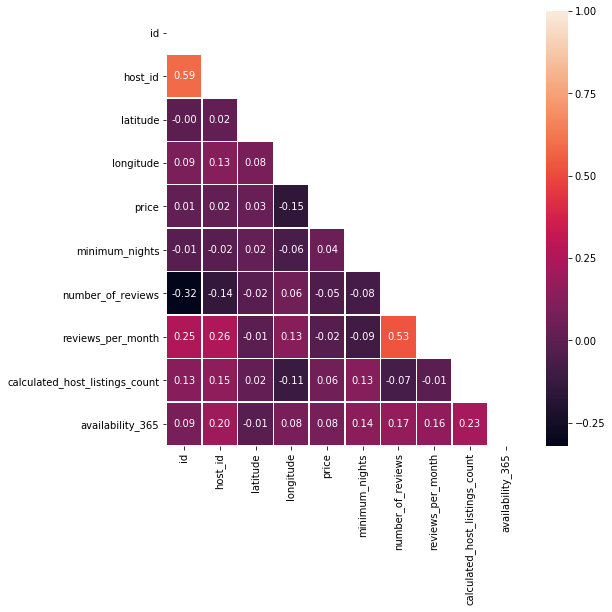

In [7]:
import seaborn as sns
corr_1 = mydata.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

<h3>Correlation heatmap shows a high correlation between number of reviews and reviews per month. </h3>

<h3>Relation between neighbourhood group and availability</h3>

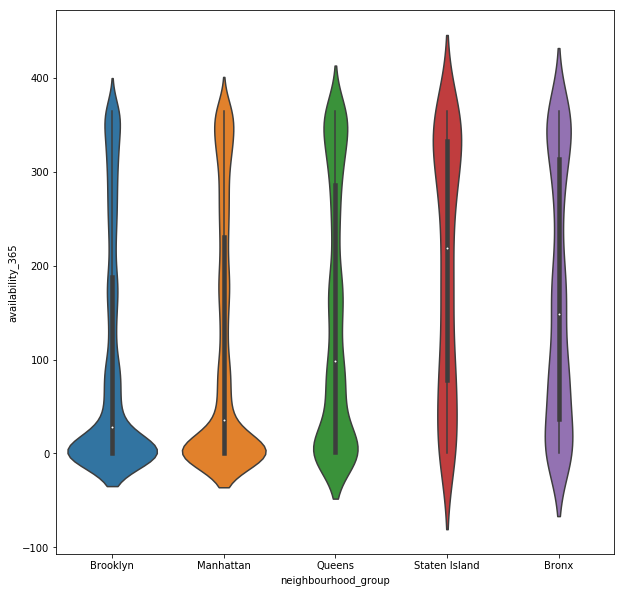

In [8]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=mydata, x="neighbourhood_group", y="availability_365")

<h3>Violin Plot shows that Staten Island has the highest mean availability value around 220-250 days compared to others</h3>

<h3>Relation between neighbourhood group and price</h3>

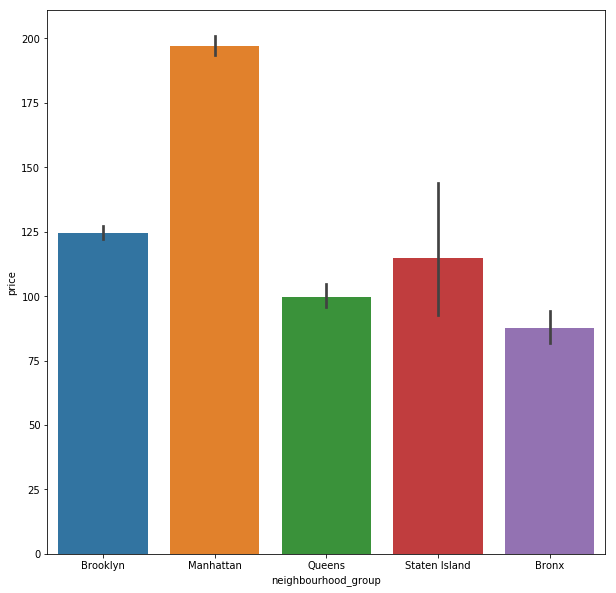

In [9]:
plt.figure(figsize=(10,10))
sns.barplot(data=mydata, x='neighbourhood_group', y='price')

<h3>Bar plot plotted between neighbourhood group and price showas that Manhattan has the most expensive prices.</h3>

<h3>Since we have latitude and longitude of each listing, let's plot it using a scatterplot</h3>

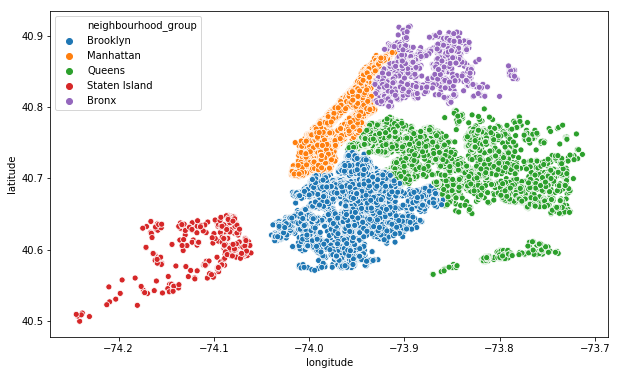

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(mydata.longitude,mydata.latitude,hue=mydata.neighbourhood_group)
plt.ioff()

### From the points on the map we can see that there is more density in the Brooklyn and Manhattan.

<h3> Now let's categorise rooms based on price 
Let price less than 75 dollars be low,<br>
between 75 and 500 dollars be medium and<br>
above 500 dollars be high</h3>

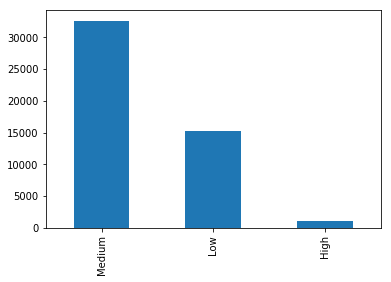

In [11]:
def categorise(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'
mydata['price'].apply(categorise).value_counts().plot(kind='bar');

### Most of the rooms fall in the Medium (75-500 $) category followed by Low and High range rooms.Very few people prefer to live in high priced rooms.

### Now lets analyse the names of the listings.

<Figure size 720x432 with 0 Axes>

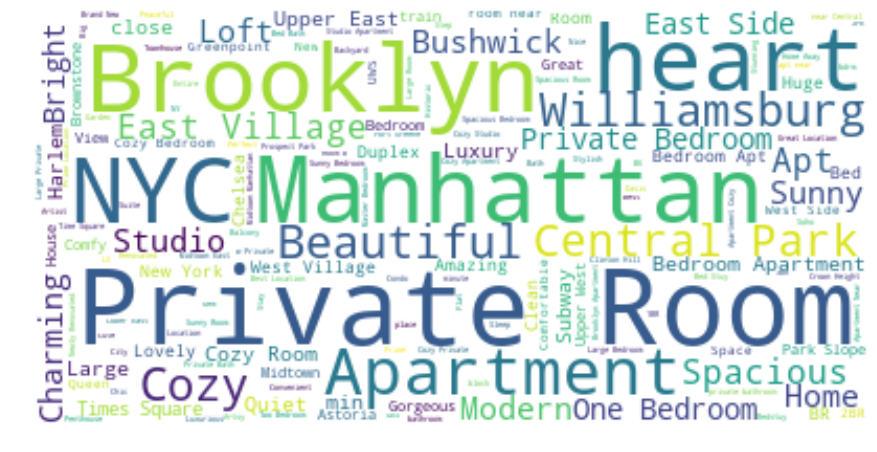

In [17]:
#word cloud

import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in mydata.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

### Our word cloud shows the words that are more often used in the Name of this listings.We can see most of the words are related to the description,place and the experince in the room.

### Now let's analyse the number of reviews

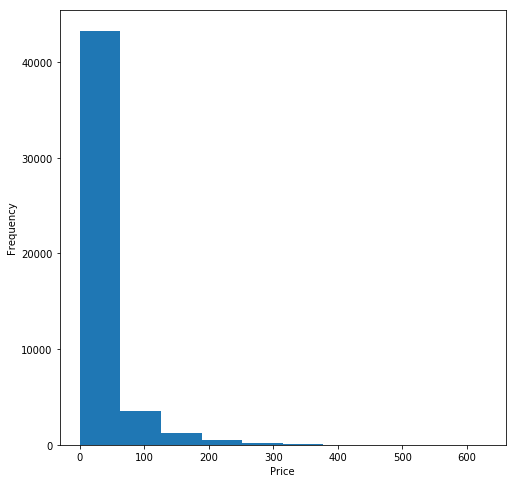

In [20]:
plt.figure(figsize=(8,8))
mydata['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

<h3> From the histogram we can see that low cost rooms or in range 0-50 $ have more reviews.This shows us that people who pay more for the rooms generally dont write reviews.It is observed people write reviews more if they are not happy with their experience.In case of costly rooms there is high possibility that the customers are happy.So they dont write much reviews.</h3>